In [ ]:
!pip install --quiet yfinance prophet

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from prophet import Prophet

#Set start date, end date, intervals, and the Ticker
start_dt = "2022-12-01"
end_dt = "2022-12-31" 
interval = "30m"
ticker = ["BTC-USD"]

#Use Yahoo Finance to download the ticker data in a dataframe.
df = yf.download(ticker, start=start_dt, end=end_dt, interval=interval)

#Reset the index
df.reset_index(level=0, inplace=True)
print (df.head())

#Just have two columns for the Time Series Forecasting
crypto_df = df[['Datetime', 'Close']] 
crypto_df = crypto_df.rename(columns={'Datetime':'ds','Close':'y'})

print(crypto_df.head())


[*********************100%***********************]  1 of 1 completed
             Datetime          Open          High           Low         Close  \
0 2022-12-01 00:00:00  17168.001953  17194.062500  17150.039062  17189.185547   
1 2022-12-01 00:30:00  17190.250000  17190.250000  17149.576172  17155.687500   
2 2022-12-01 01:00:00  17156.412109  17159.654297  17124.287109  17124.287109   
3 2022-12-01 01:30:00  17125.582031  17136.578125  17125.582031  17127.626953   
4 2022-12-01 02:00:00  17126.072266  17137.496094  17115.566406  17116.097656   

      Adj Close     Volume  
0  17189.185547  462434304  
1  17155.687500  287338496  
2  17124.287109          0  
3  17127.626953   39018496  
4  17116.097656          0  
                   ds             y
0 2022-12-01 00:00:00  17189.185547
1 2022-12-01 00:30:00  17155.687500
2 2022-12-01 01:00:00  17124.287109
3 2022-12-01 01:30:00  17127.626953
4 2022-12-01 02:00:00  17116.097656


In [4]:
#Prophet Time Series Forecasting
m = Prophet(interval_width=0.95)
m.fit(crypto_df)

# Create 4 records, that shows the predictions in the future.
# For the next two hours, with 30 min duration.  
future = m.make_future_dataframe(periods=4, freq='30min')

# Make predictions
forecast = m.predict(future)
forecast = forecast.round(0)

#merge forecase and crypto_df
forecast1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1 = pd.merge( forecast1, crypto_df, on="ds", how ="left")
forecast1 = forecast1.rename(columns={'ds': 'Datetime', 'y' : 'Actual', 'yhat': "Predicted" })

#df.Datetime = df.Datetime.astype('datetime64[ns]')
forecast1

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfc60ivn_/j399w30i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfc60ivn_/oswkhhr4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90979', 'data', 'file=/tmp/tmpfc60ivn_/j399w30i.json', 'init=/tmp/tmpfc60ivn_/oswkhhr4.json', 'output', 'file=/tmp/tmpfc60ivn_/prophet_modeli0jawmg4/prophet_model-20221226052434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,Datetime,Predicted,yhat_lower,yhat_upper,Actual
0,2022-12-01 00:00:00,17184.0,17050.0,17304.0,17189.185547
1,2022-12-01 00:30:00,17178.0,17049.0,17295.0,17155.687500
2,2022-12-01 01:00:00,17173.0,17047.0,17302.0,17124.287109
3,2022-12-01 01:30:00,17168.0,17048.0,17301.0,17127.626953
4,2022-12-01 02:00:00,17163.0,17034.0,17296.0,17116.097656
...,...,...,...,...,...
1210,2022-12-26 05:00:00,16824.0,16698.0,16954.0,16893.091797
1211,2022-12-26 05:30:00,16823.0,16680.0,16946.0,NaN
1212,2022-12-26 06:00:00,16820.0,16681.0,16946.0,NaN
1213,2022-12-26 06:30:00,16817.0,16691.0,16946.0,NaN


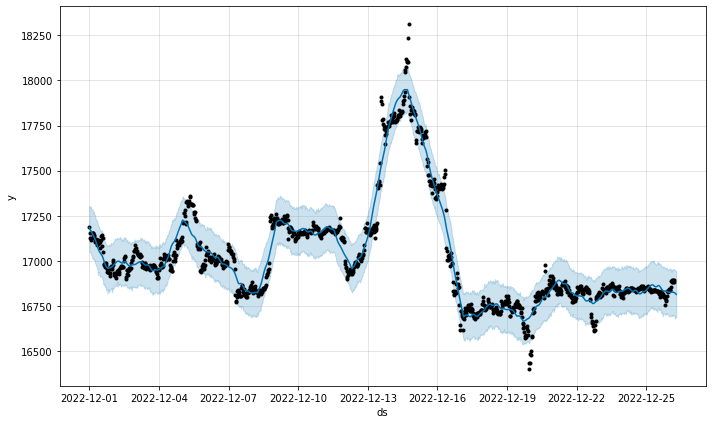

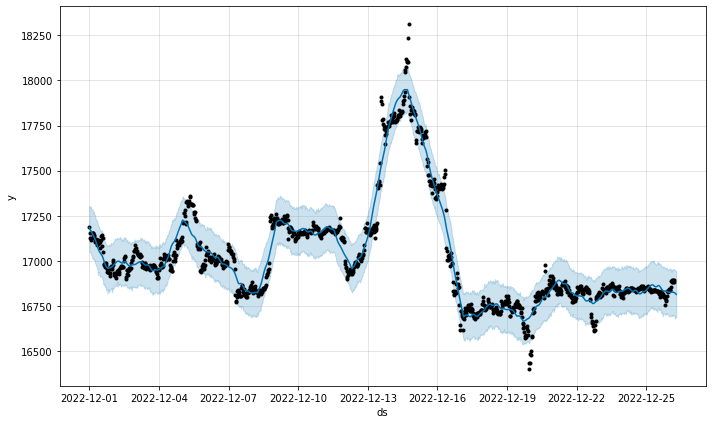

In [6]:
#Plot the data
m.plot(forecast, uncertainty= True)